In [1]:
from nuscenes import NuScenes

nusc = NuScenes(version='v1.0-trainval', dataroot='../nuscenes', verbose=True)


Loading NuScenes tables for version v1.0-trainval...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 19.553 seconds.
Reverse indexing ...
Done reverse indexing in 4.6 seconds.


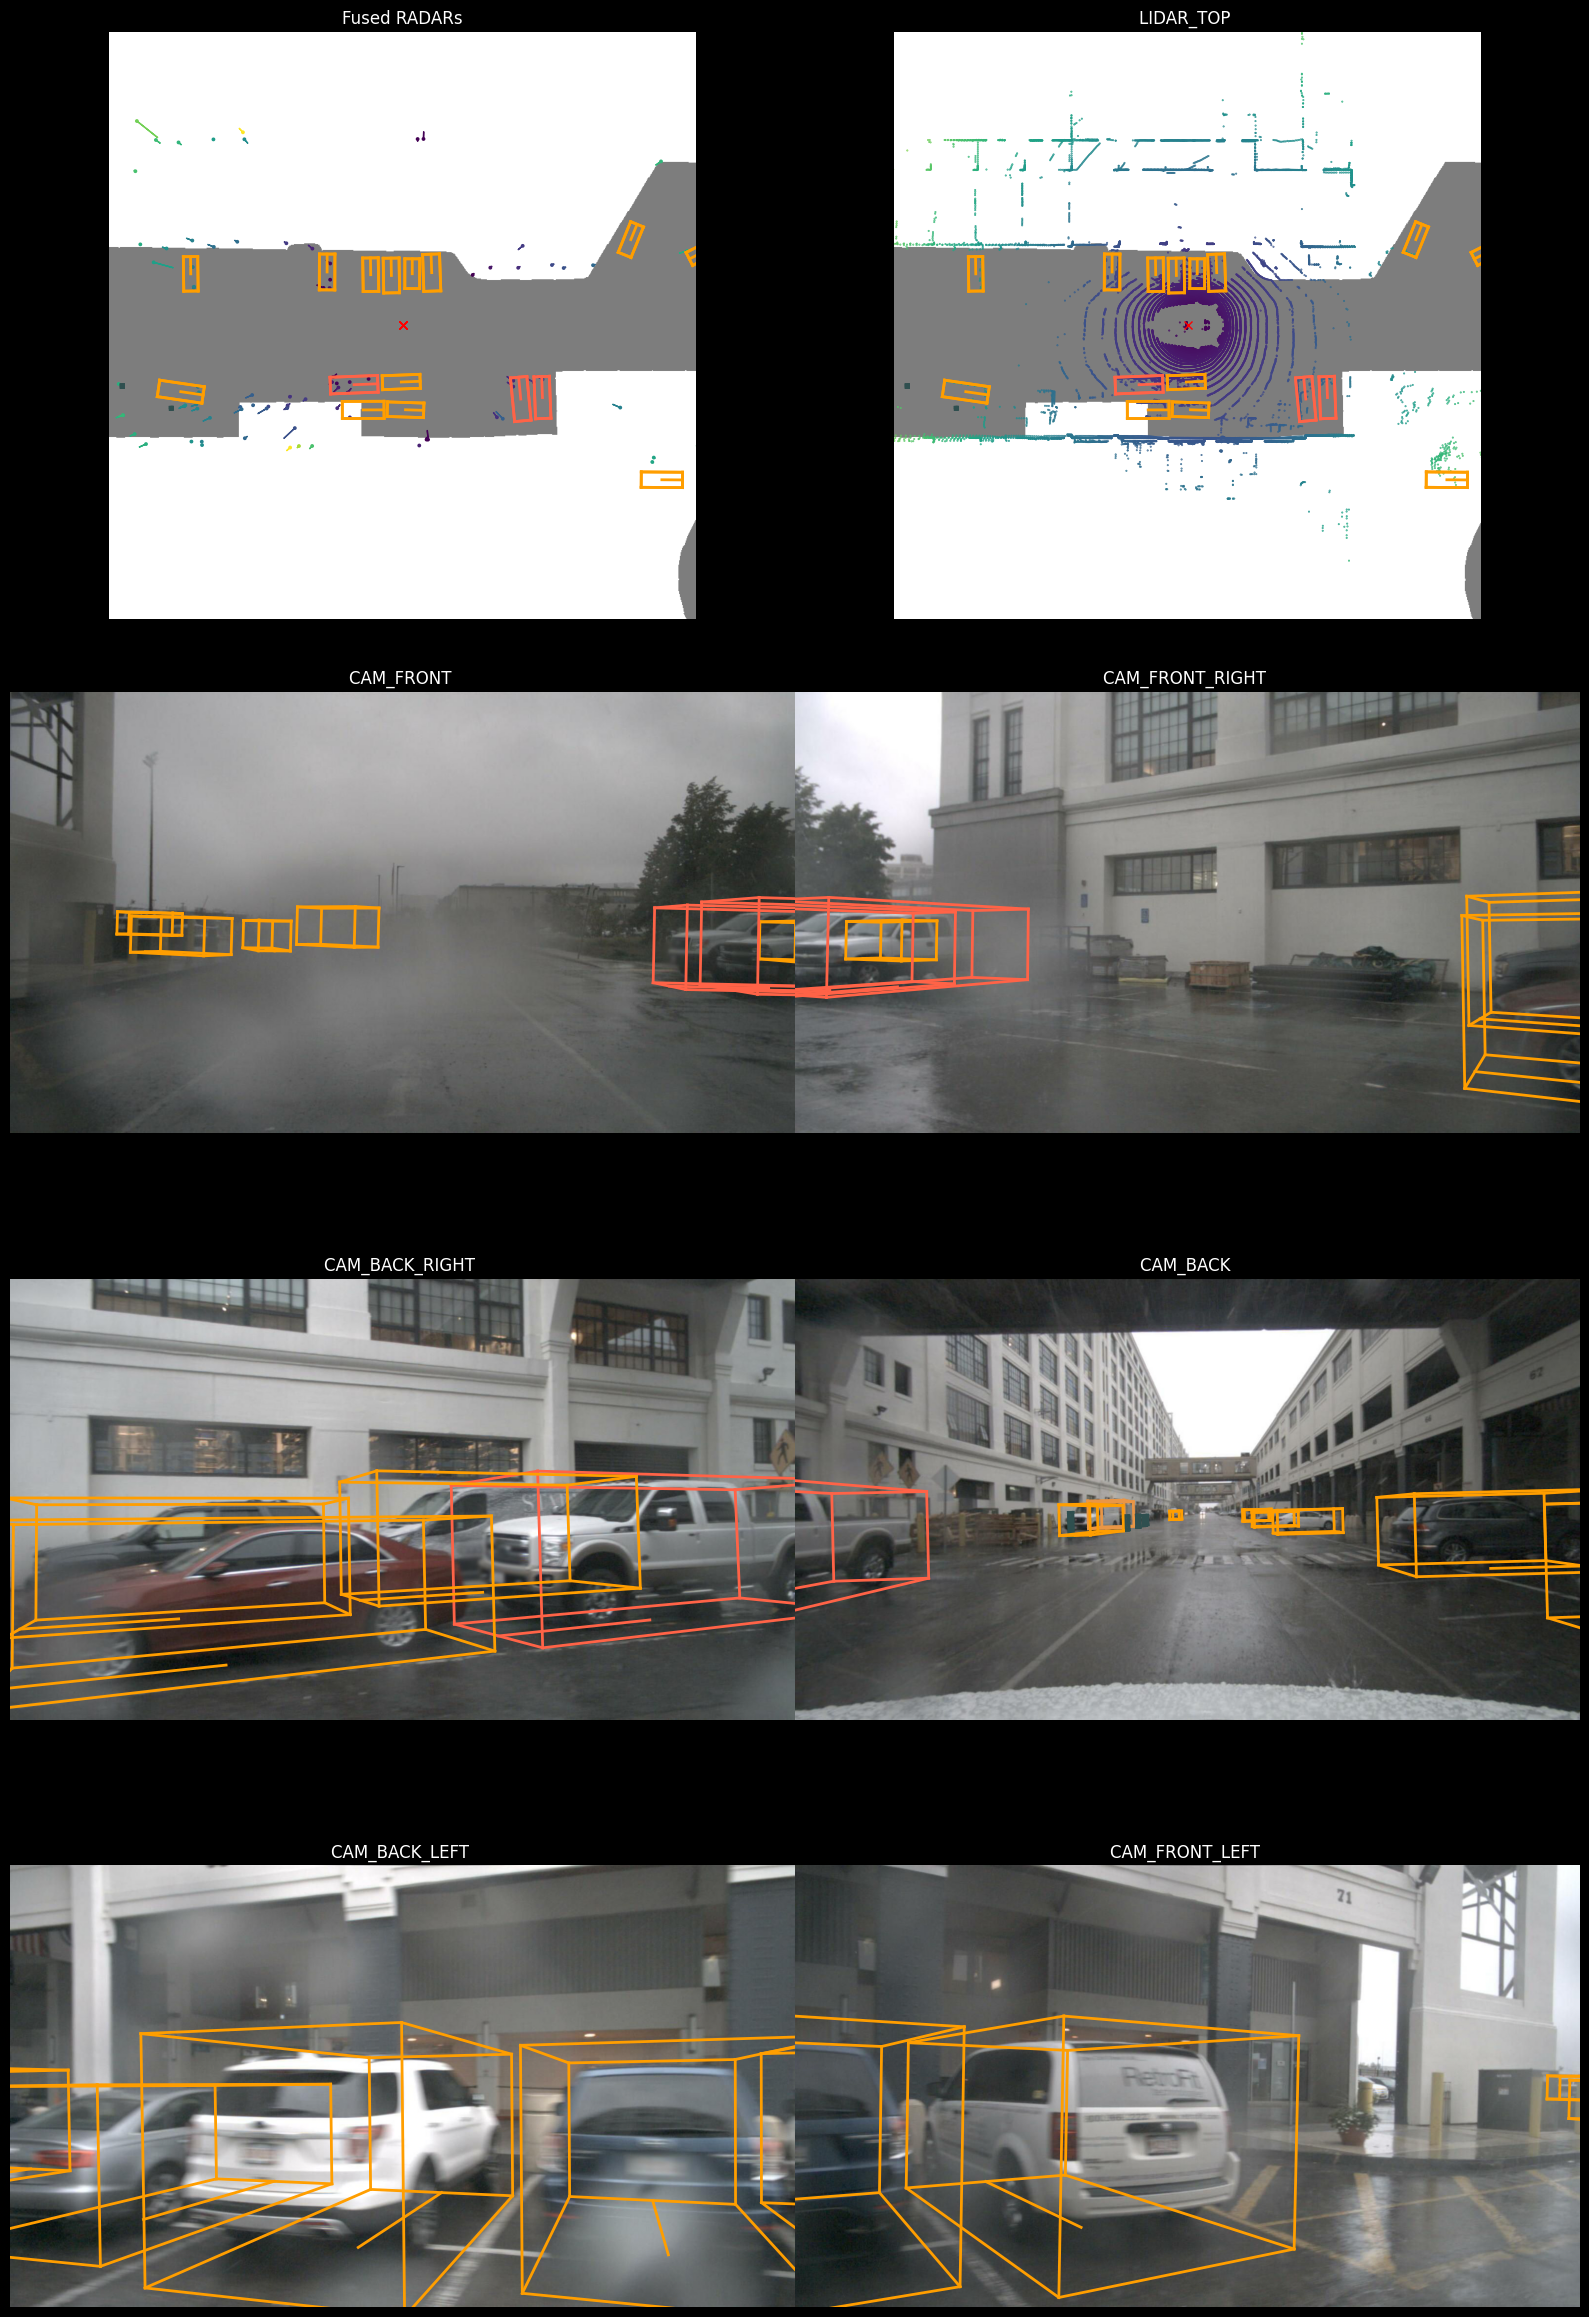

In [23]:
nusc.render_sample('d08abcb26dd84ae9acfb2a666228644e')

In [27]:
# import quaternion to euler angle from scipy
from scipy.spatial.transform import Rotation as R
anns = nusc.get('sample', "d08abcb26dd84ae9acfb2a666228644e")['anns']
count = 0
for ann in anns:
    entry = nusc.get('sample_annotation', ann)
    if entry['category_name'] != 'vehicle.car' or entry['num_lidar_pts'] == 0 or entry['num_radar_pts'] == 0:
        continue
    # convert quaternion to euler angle
    r = R.from_quat(entry['rotation'])
    print(r.as_euler('xyz', degrees=True))
    count += 1
print(count)


[-91.07999998   0.           0.        ]
[88.02  0.    0.  ]
[-92.16   0.     0.  ]
[-91.98   0.     0.  ]
[0.58 0.   0.  ]
[-53.16   0.     0.  ]
[-92.16   0.     0.  ]
[-1.42  0.    0.  ]
[0.99 0.   0.  ]
[7.08 0.   0.  ]
10


In [1]:
# Loop through all sample_data and verify if LIDAR_TOP file exists
import os
from tqdm import tqdm
count = 0
for sample in tqdm(nusc.sample):
    lidar_token = sample['data']['LIDAR_TOP']
    lidar_path = nusc.get_sample_data_path(lidar_token)
    # try to open the file
    if not os.path.exists(lidar_path):
        count += 1
        print(f"File {lidar_path} does not exist")
        continue
print(f"{count} files do not exist")

NameError: name 'nusc' is not defined

In [8]:
import pickle
import json

# Load the Pickle file
with open('/home/vxm240030/CenterPoint/work_dirs/nusc_centerpoint_pp_02voxel_two_pfn_10sweep/train/version_12/prediction.pkl', 'rb') as f:
    data = pickle.load(f)

# Convert the data to JSON format and save to a JSON file
x = {}
x['results'] = data
with open('/home/vxm240030/CenterPoint/work_dirs/nusc_centerpoint_pp_02voxel_two_pfn_10sweep/train/version_12/prediction.json', 'w') as f:
    json.dump(x, f)

# x['results'][0]
